In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import slugger as slug
import pandas as pd

from matplotlib.colors import LogNorm

params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
def plot_cont(ax, data, vlim, draw_cb=True, **kwargs):

    # plot dens
    var = 'dens'

    # get variable data
    var_data = slug.get_data(data, var)

    # get edge grid
    xi, yi = data.edge_grid()

    # cmap plot
    im = ax.pcolormesh(xi, yi, var_data, vmin=vlim[0], vmax=vlim[1], **kwargs)
    if(draw_cb):
        cb = slug.add_colorbar(im)
        cb.ax.tick_params(labelsize=7)

    # contour plot
    nlevel = 200
    extent = (np.amin(data.x), np.amax(data.x),
              np.amin(data.y), np.amax(data.y))

    levels = np.linspace(vlim[0], vlim[1], nlevel)

    ax.contour(var_data, extent=extent, levels=levels, linewidths=0.1, colors='k')

    ax.set_aspect(aspect=1)

    ax.tick_params(axis='both', which='major', labelsize=7)
    
    return im

In [3]:
gp2_ed20sd5_sf3 = slug.load_data2d('shockvortex_gp2_ed20sd5_sf3_10001.slug')
gp2_ed20sd10_sf3 = slug.load_data2d('shockvortex_gp2_ed20sd10_sf3_10001.slug')
gp2_ed20sd20_sf3 = slug.load_data2d('shockvortex_gp2_ed20sd20_sf3_10001.slug')
gp2_ed20sd30_sf3 = slug.load_data2d('shockvortex_gp2_ed20sd30_sf3_10001.slug')

weno5_sf4 = slug.load_data2d('shockvortex_weno5_sf4_10001.slug')
highres = slug.load_data2d('shockvortex_weno5_sf3_highres_10001.slug')

In [4]:
vlim = (0.7, 2.2)

In [5]:
weno5_sf4.dens.max()

1.9711660471486503

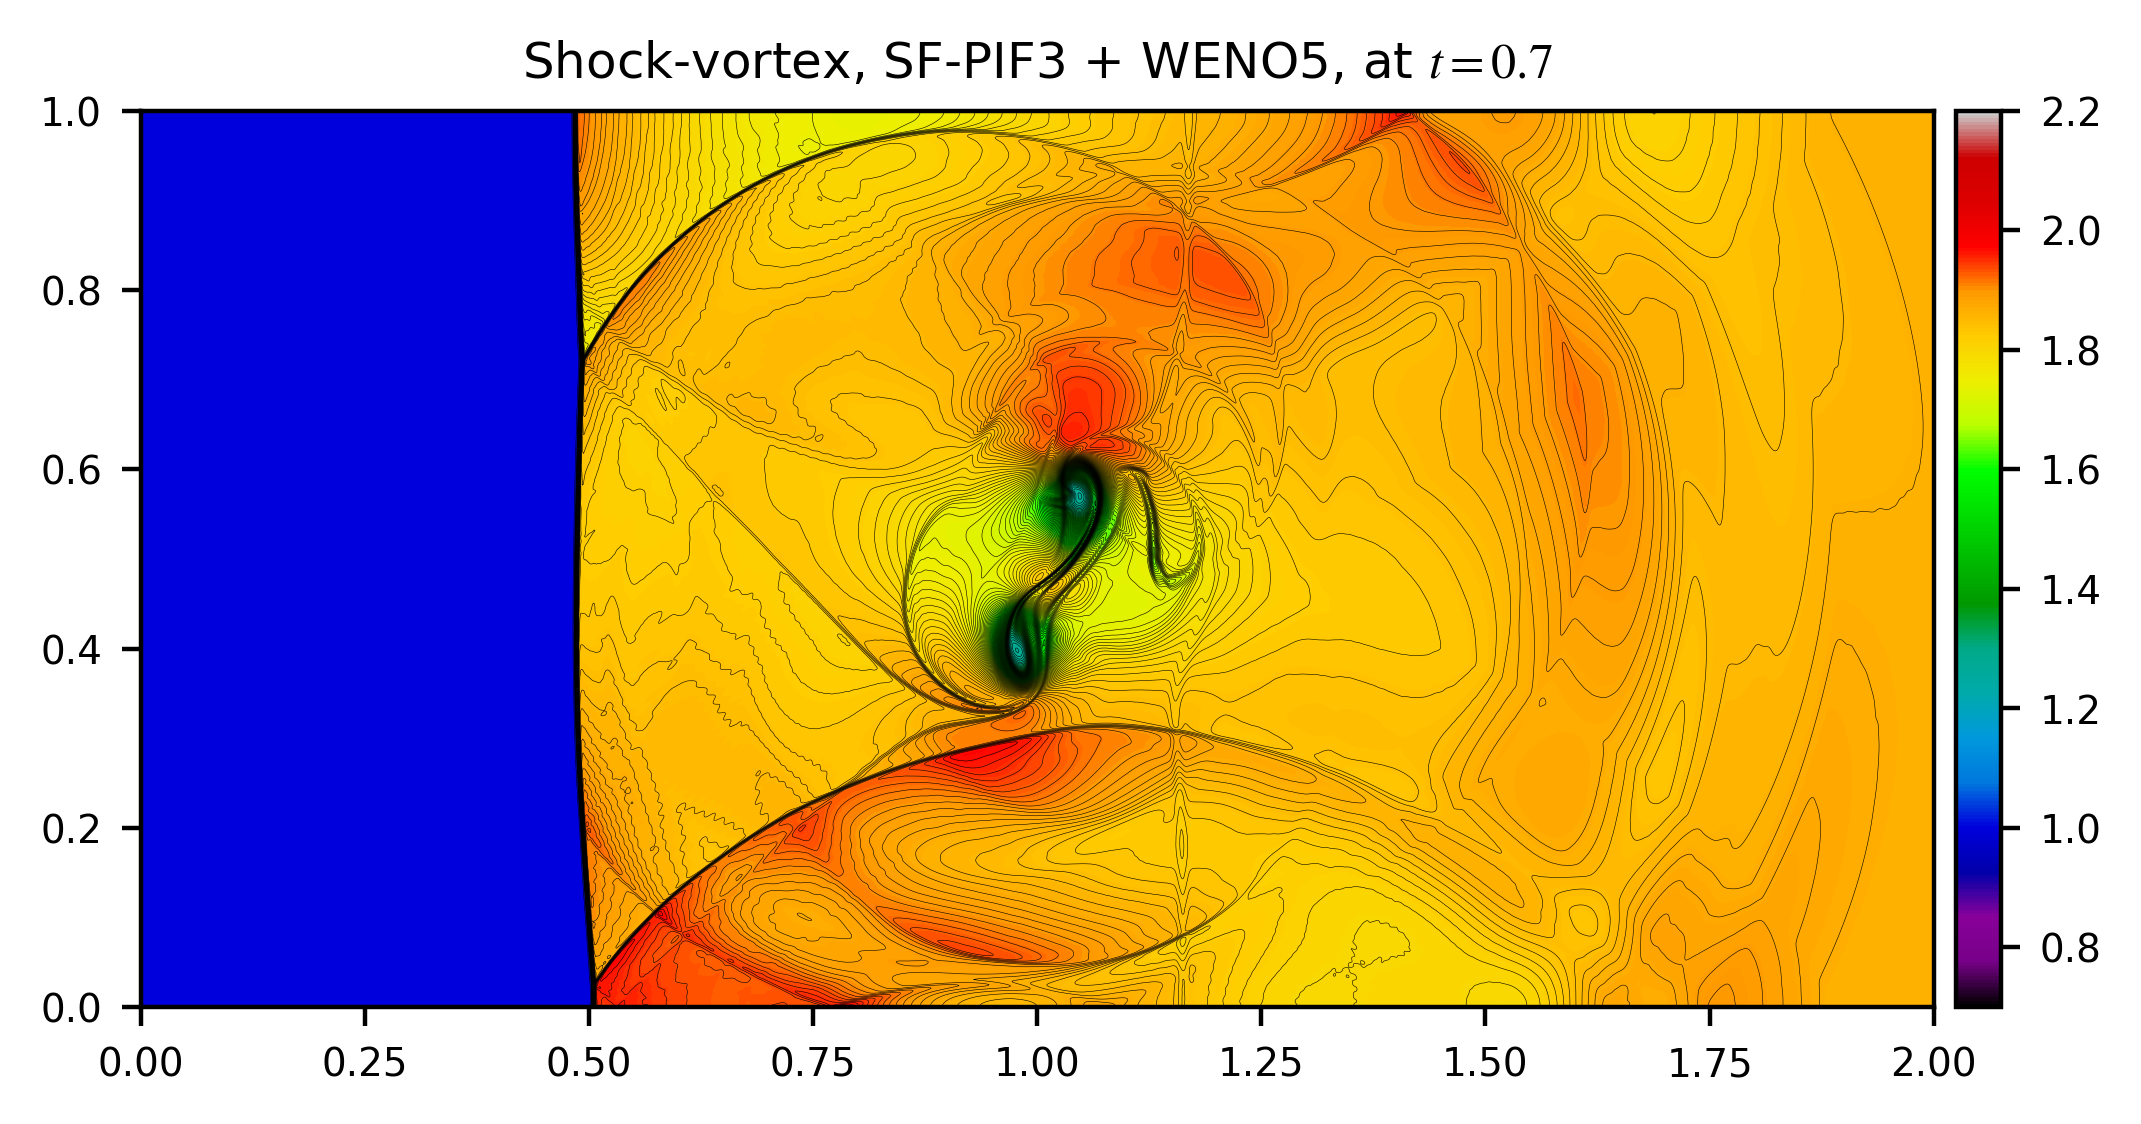

In [6]:
fig = plt.figure(figsize=(6,3), dpi=400)
ax = fig.add_subplot(1,1,1)

plot_cont(ax, highres, vlim, cmap='nipy_spectral')
ax.set_title('Shock-vortex, SF-PIF3 + WENO5, at $t=0.7$', fontsize=9)

ax.set_aspect(aspect=1)
# ax.set(xlim=(2.7, 3.5), ylim=(0., .8))

# fig.subplots_adjust(hspace=0., wspace=0., top=0.85)

fig.savefig('./shockvortex_highres.png', bbox_inches='tight', pad_inches=0)

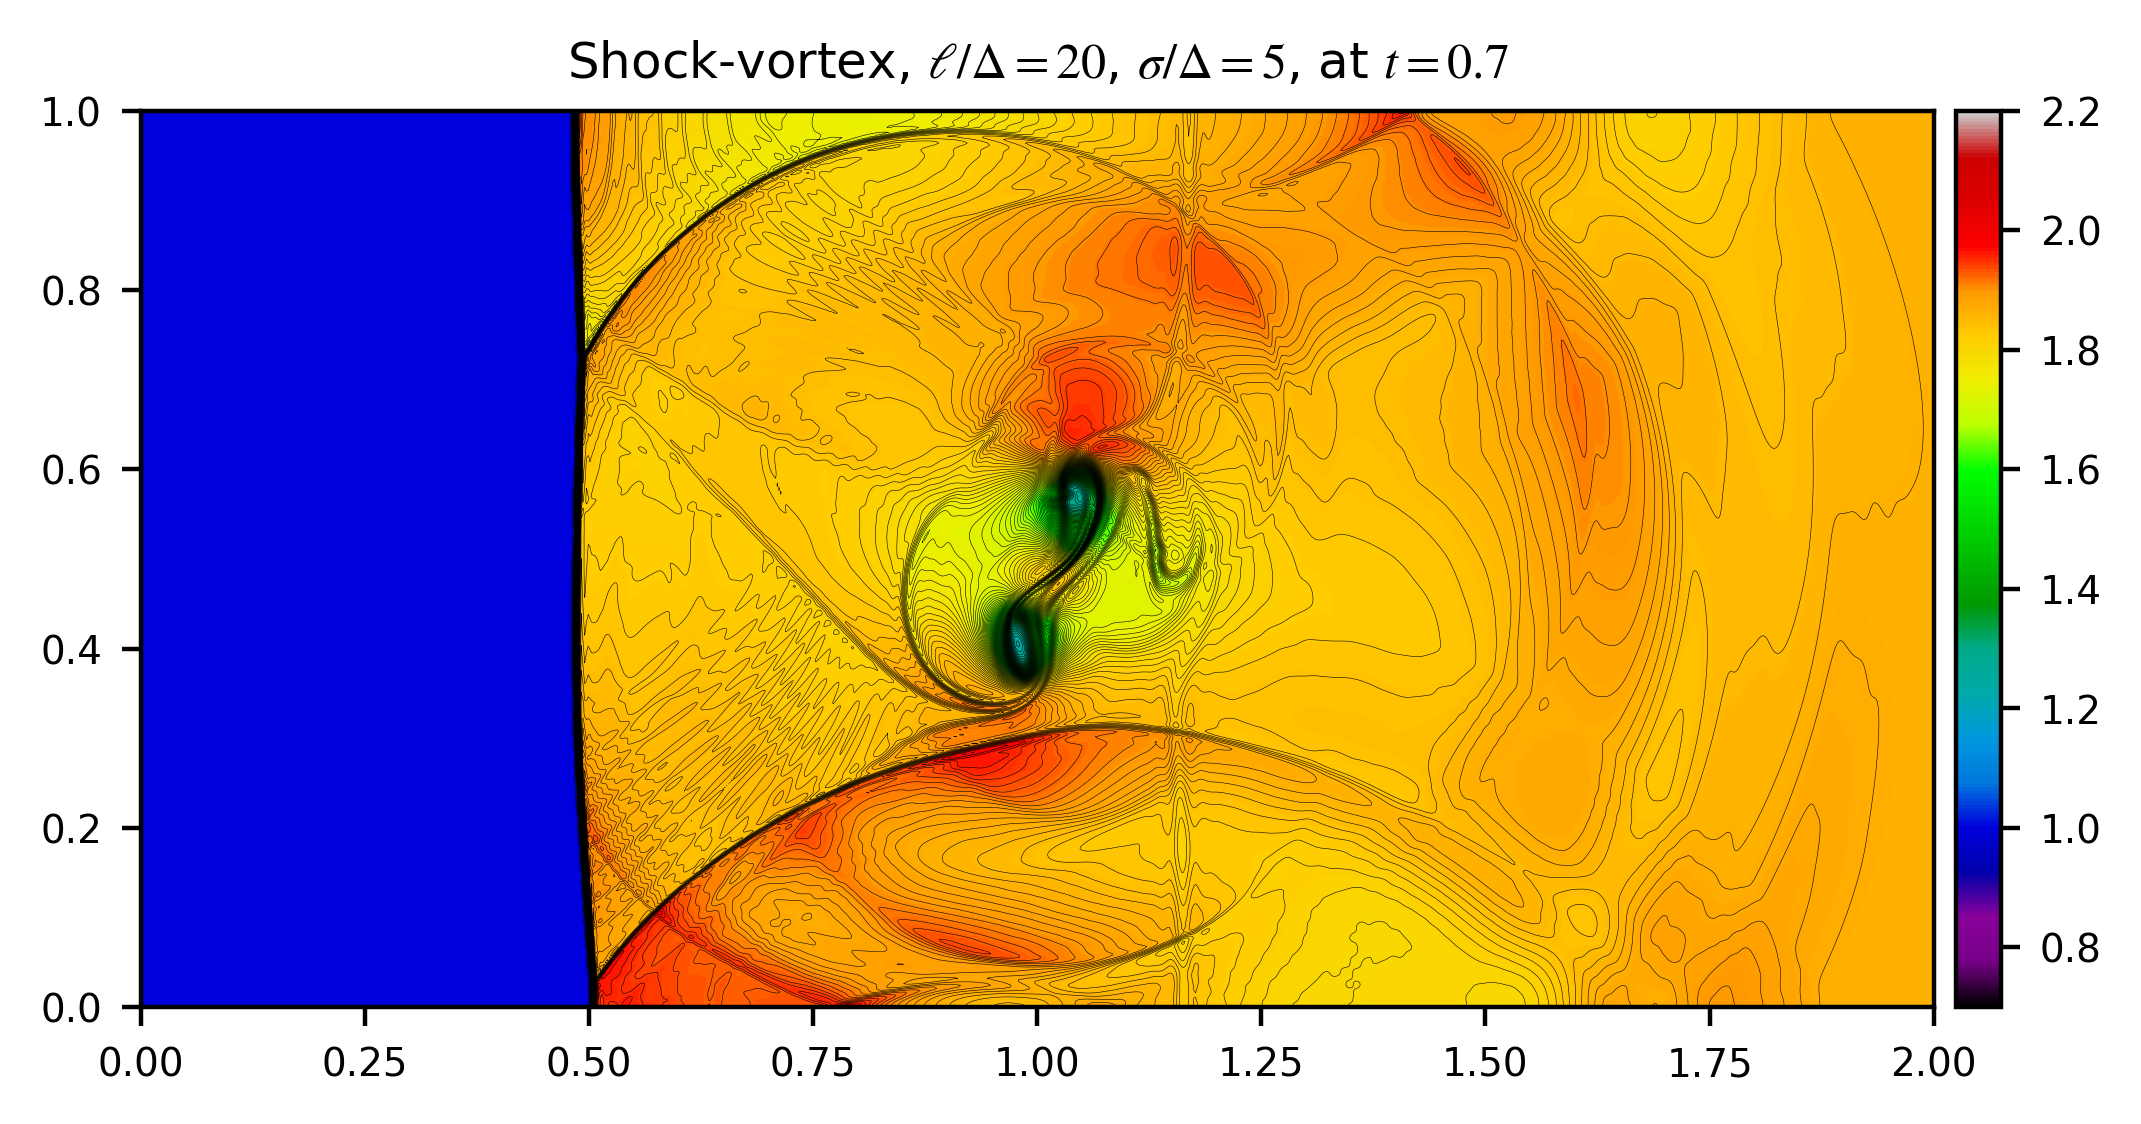

In [7]:
fig = plt.figure(figsize=(6,3), dpi=400)
ax = fig.add_subplot(1,1,1)

plot_cont(ax, gp2_ed20sd5_sf3, vlim, cmap='nipy_spectral')
ax.set_title('Shock-vortex, $\ell/\Delta = 20$, $\sigma/\Delta = 5$, at $t=0.7$', fontsize=9)
ax.set_aspect(aspect=1)

fig.savefig('./shockvortex_gp_ed20_sd5.png', bbox_inches='tight', pad_inches=0)

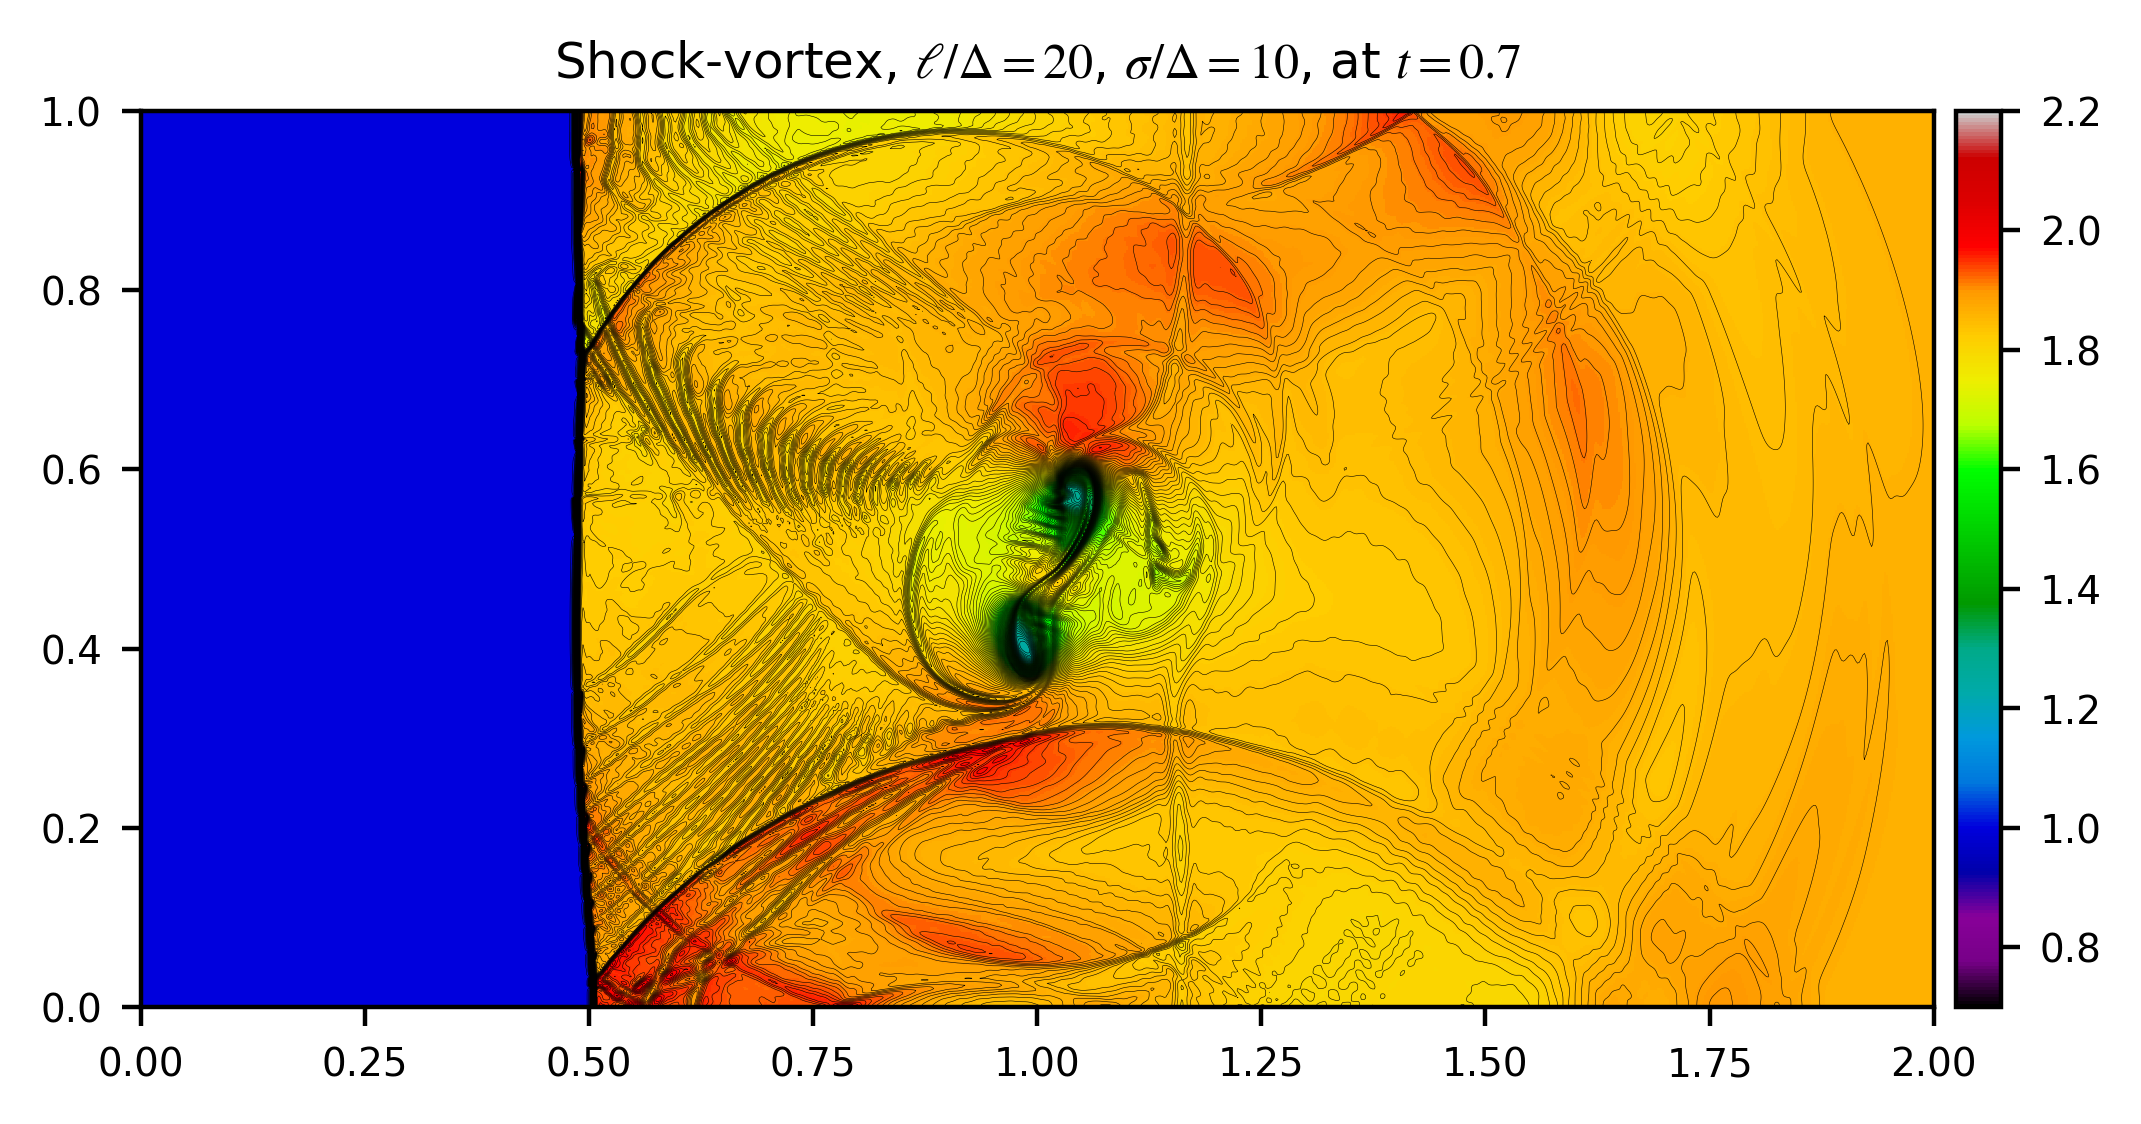

In [8]:
fig = plt.figure(figsize=(6,3), dpi=400)
ax = fig.add_subplot(1,1,1)

plot_cont(ax, gp2_ed20sd10_sf3, vlim, cmap='nipy_spectral')
ax.set_title('Shock-vortex, $\ell/\Delta = 20$, $\sigma/\Delta = 10$, at $t=0.7$', fontsize=9)
ax.set_aspect(aspect=1)

fig.savefig('./shockvortex_gp_ed20_sd10.png', bbox_inches='tight', pad_inches=0)

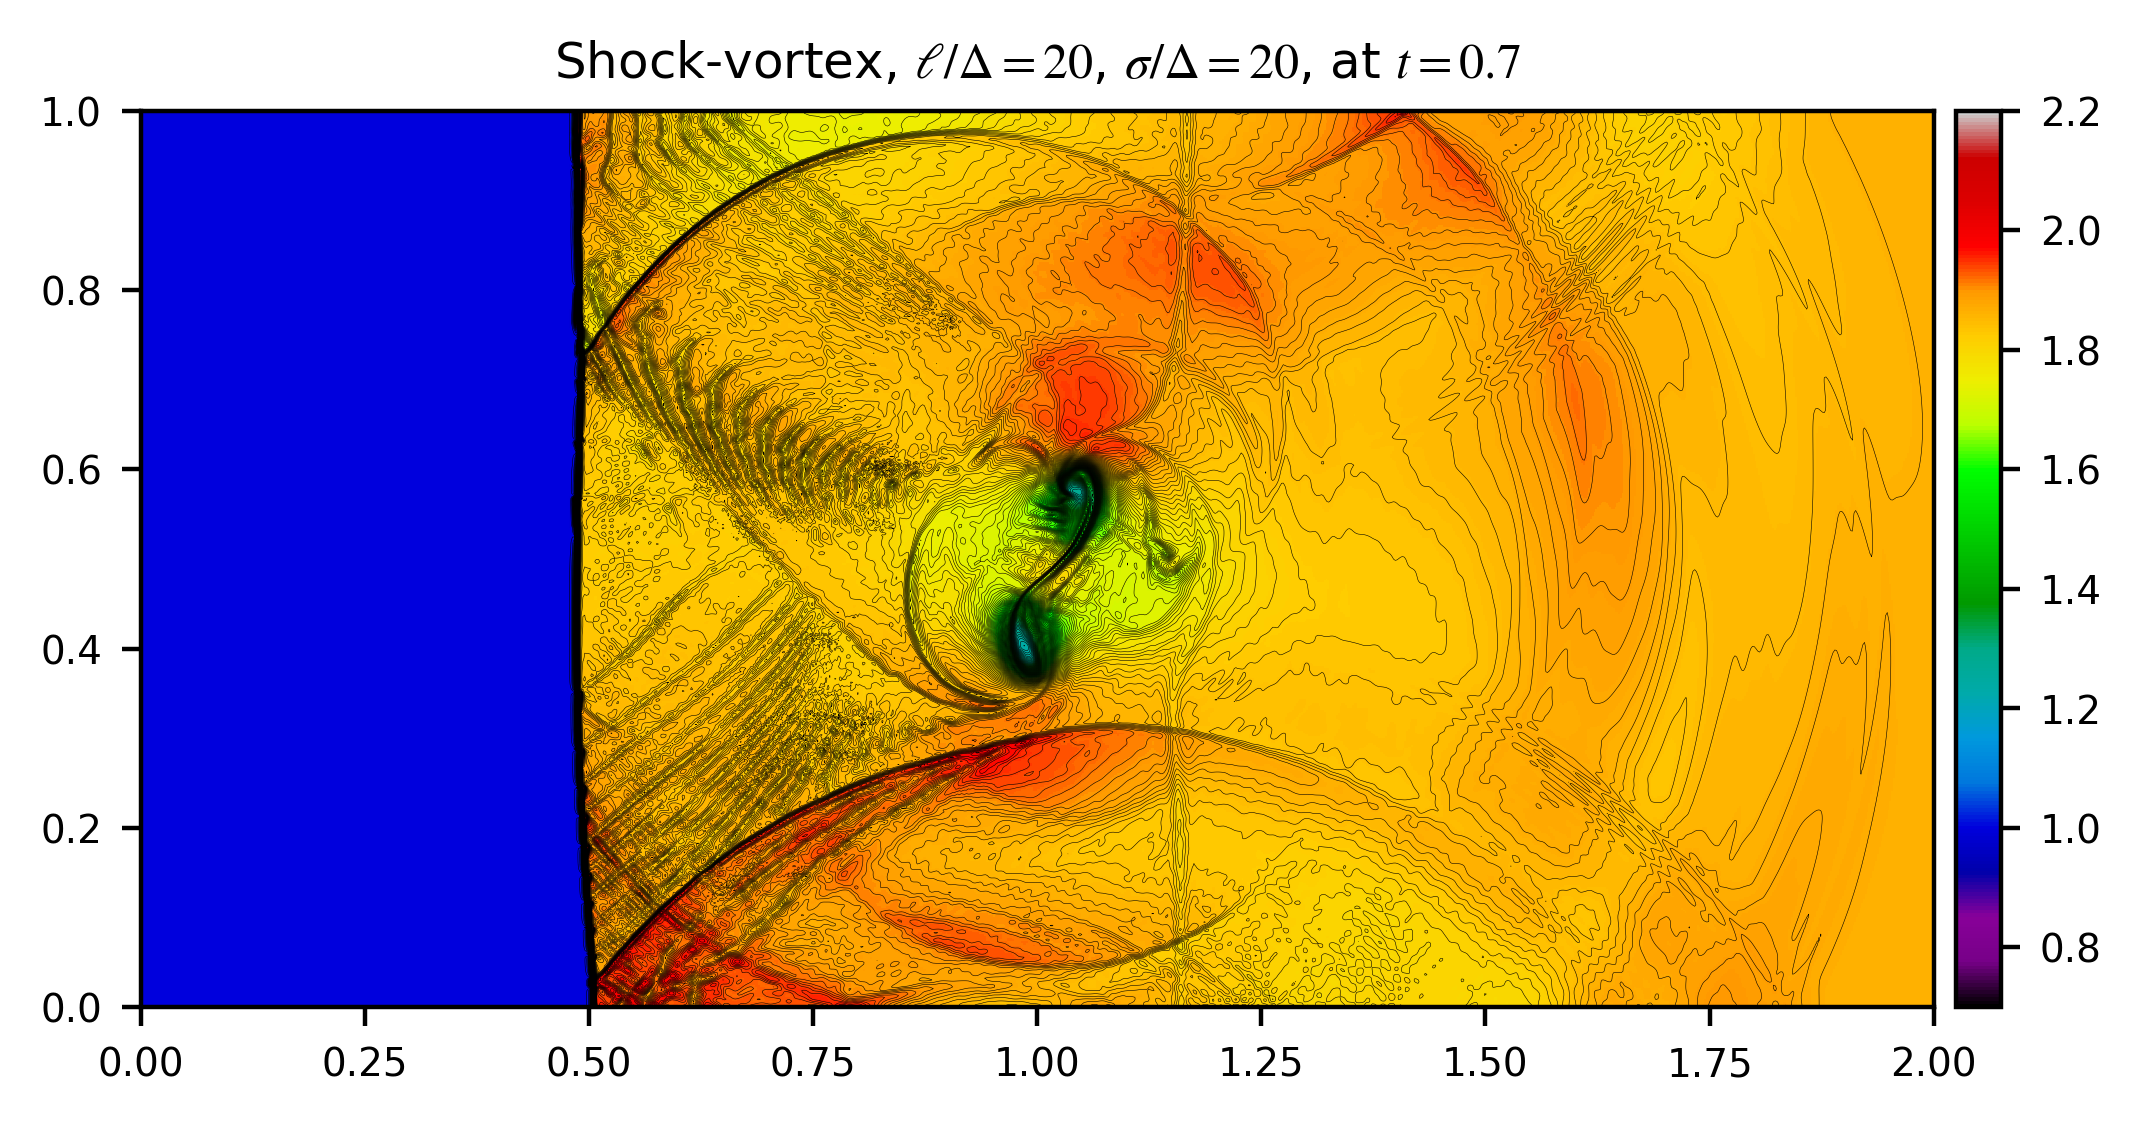

In [9]:
fig = plt.figure(figsize=(6,3), dpi=400)
ax = fig.add_subplot(1,1,1)

plot_cont(ax, gp2_ed20sd20_sf3, vlim, cmap='nipy_spectral')
ax.set_title('Shock-vortex, $\ell/\Delta = 20$, $\sigma/\Delta = 20$, at $t=0.7$', fontsize=9)
ax.set_aspect(aspect=1)

fig.savefig('./shockvortex_gp_ed20_sd20.png', bbox_inches='tight', pad_inches=0)

In [10]:
gp2_ed20sd30_sf3.dens.min()

0.7454061651303902